In [1]:
using Distributions, Plots, StatsPlots

「標準ベイズ統計学」朝倉書房の3.2.2 例：出生率より

In [2]:
# 事前分布のパラメータ
a = 2
b = 1
# グループ1
n1 = 111 # 調査対象の女性の人数
sy1 = 217 # 各調査対象の子供の人数の合計
# グループ2
n2 = 44
sy2 = 66

66

Pr(θ1 > θ2|ΣYᵢ₁=217,ΣYᵢ₂=66) = 0.9705%


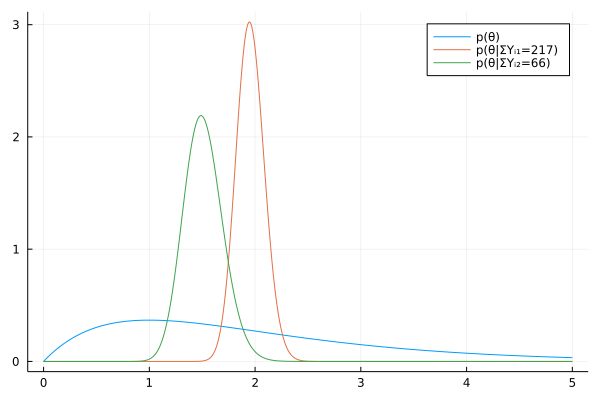

In [3]:
let
    pre_gamma = Gamma(a,b) # 事前分布
    grp1_gamma = Gamma(a+sy1, 1/(b+n1)) #グループ１事後分布
    grp2_gamma = Gamma(a+sy2, 1/(b+n2)) # グループ2事後分布
    x_range = 0:0.01:5.0
    
    # θ1 > θ2 の確率を、乱数を用いて求める
    N = 10_000
    rnd_grp1 = rand(grp1_gamma, N)
    rnd_grp2 = rand(grp2_gamma, N)
    num_grp1_gt_grp2 = sum(map(r -> r[1] > r[2] ? 1 : 0, zip(rnd_grp1, rnd_grp2)))
    println("Pr(θ1 > θ2|ΣYᵢ₁=$sy1,ΣYᵢ₂=$sy2) = $(num_grp1_gt_grp2/N)%") # テキストは0.97と記載されている。
    
    # 事前分布/事後分布の描画
    plot(x_range, pre_gamma, fmt=:png, label="p(θ)")
    plot!(x_range, grp1_gamma, label="p(θ|ΣYᵢ₁=$sy1)")
    plot!(x_range, grp2_gamma, label="p(θ|ΣYᵢ₂=$sy2)")
end